In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the house data into a data frame
df = pd.read_excel("C:\Work\Python\Plastic Models\Plastic models.xlsx")
#df = pd.read_excel("\\Ie4ldtj1m6n62\SERVER\Webscraping\Python Code\Regression Analysis\Regression Analysis (Plastic)\Plastic models.xlsx")


In [2]:
# Describe the dataset
df.describe().round(2)

,Net_Weight.1,Length.1,Width.1,Height.1,Costing_BOM.AnnualVolume,Costing_BOM.NoofShifts,Costing_BOM.LotSize,Costing_BOM.Should_Cost,Costing_BOM.Material_Cost,Year,Qtr Values
count,3598.00,3598.00,3598.00,3598.00,3598.00,3598.00,3598.00,3598.00,3598.00,3598.00,3598.00
mean,74.60,146.25,54.57,21.43,531307.71,2.78,9.45,0.72,0.31,2022.31,0.34
std,907.79,1613.56,54.06,27.20,1215479.44,0.56,3.93,6.77,2.88,0.46,0.23
min,0.00,1.45,1.24,0.10,2.00,1.00,1.00,0.00,0.00,2020.00,0.00
25%,1.29,25.40,17.78,7.00,29841.00,3.00,8.00,0.03,0.01,2022.00,0.25
50%,6.76,58.70,41.01,13.87,100000.00,3.00,9.00,0.07,0.03,2022.00,0.25
75%,27.77,100.90,82.98,25.30,464574.00,3.00,12.00,0.30,0.12,2023.00,0.50
max,27100.00,50292.00,800.00,355.60,14000000.00,3.00,88.00,188.96,79.48,2023.00,0.75


In [3]:
# Check the types of data
df.dtypes

Net_Weight.1                    float64
PartShape.1                      object
Length.1                        float64
Width.1                         float64
Height.1                        float64
Costing_BOM.DeliveryLocation     object
Costing_BOM.AnnualVolume          int64
Costing_BOM.NoofShifts            int64
Costing_BOM.LotSize               int64
Costing_BOM.Should_Cost         float64
Costing_BOM.Material_Cost       float64
Year                              int64
A/F                              object
Qtr Values                      float64
dtype: object

In [3]:
# Specify target and features
target = df.iloc[:, 10].name
features = df.iloc[:, 1:].columns.tolist()
features

['PartShape.1',
 'Length.1',
 'Width.1',
 'Height.1',
 'Costing_BOM.DeliveryLocation',
 'Costing_BOM.AnnualVolume',
 'Costing_BOM.NoofShifts',
 'Costing_BOM.LotSize',
 'Costing_BOM.Should_Cost',
 'Costing_BOM.Material_Cost',
 'Year',
 'A/F',
 'Qtr Values']

In [5]:
len(df)

3598

In [4]:
# Display the number of starting features
len(df.columns)

14

In [7]:
# Display the number of null data observations
df.isnull().values.sum()

0

In [5]:
df.shape

(3598, 14)

In [6]:
target

'Costing_BOM.Material_Cost'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Net_Weight.1                  3598 non-null   float64
 1   PartShape.1                   3598 non-null   object 
 2   Length.1                      3598 non-null   float64
 3   Width.1                       3598 non-null   float64
 4   Height.1                      3598 non-null   float64
 5   Costing_BOM.DeliveryLocation  3598 non-null   object 
 6   Costing_BOM.AnnualVolume      3598 non-null   int64  
 7   Costing_BOM.NoofShifts        3598 non-null   int64  
 8   Costing_BOM.LotSize           3598 non-null   int64  
 9   Costing_BOM.Should_Cost       3598 non-null   float64
 10  Costing_BOM.Material_Cost     3598 non-null   float64
 11  Year                          3598 non-null   int64  
 12  A/F                           3598 non-null   object 
 13  Qtr

In [8]:
df.corr()

,Net_Weight.1,Length.1,Width.1,Height.1,Costing_BOM.AnnualVolume,Costing_BOM.NoofShifts,Costing_BOM.LotSize,Costing_BOM.Should_Cost,Costing_BOM.Material_Cost,Year,Qtr Values
Net_Weight.1,1.000000,0.972120,0.139342,0.076549,-0.030588,-0.137263,-0.107213,0.943747,0.945793,0.066888,-0.015846
Length.1,0.972120,1.000000,0.045806,0.031571,-0.026408,-0.139202,-0.092569,0.950200,0.946405,0.063107,-0.013572
Width.1,0.139342,0.045806,1.000000,0.450954,-0.142538,-0.110225,-0.184700,0.135870,0.180129,-0.030677,0.121753
Height.1,0.076549,0.031571,0.450954,1.000000,-0.132120,-0.121435,-0.166157,0.093015,0.093622,0.055764,0.056215
Costing_BOM.AnnualVolume,-0.030588,-0.026408,-0.142538,-0.132120,1.000000,0.167349,0.263474,-0.041463,-0.041413,-0.046500,-0.066886
Costing_BOM.NoofShifts,-0.137263,-0.139202,-0.110225,-0.121435,0.167349,1.000000,0.394255,-0.180323,-0.162487,-0.113149,0.020855
Costing_BOM.LotSize,-0.107213,-0.092569,-0.184700,-0.166157,0.263474,0.394255,1.000000,-0.131076,-0.130350,-0.037959,0.009987
Costing_BOM.Should_Cost,0.943747,0.950200,0.135870,0.093015,-0.041463,-0.180323,-0.131076,1.000000,0.976242,0.069538,-0.001698
Costing_BOM.Material_Cost,0.945793,0.946405,0.180129,0.093622,-0.041413,-0.162487,-0.130350,0.976242,1.000000,0.063018,0.001947
Year,0.066888,0.063107,-0.030677,0.055764,-0.046500,-0.113149,-0.037959,0.069538,0.063018,1.000000,-0.655094


In [9]:
# Correlations of features with target variable
correlations = df.corr()
correlations['Costing_BOM.Should_Cost']

Net_Weight.1                 0.943747
Length.1                     0.950200
Width.1                      0.135870
Height.1                     0.093015
Costing_BOM.AnnualVolume    -0.041463
Costing_BOM.NoofShifts      -0.180323
Costing_BOM.LotSize         -0.131076
Costing_BOM.Should_Cost      1.000000
Costing_BOM.Material_Cost    0.976242
Year                         0.069538
Qtr Values                  -0.001698
Name: Costing_BOM.Should_Cost, dtype: float64

In [13]:
df.corr()

,Net_Weight.1,Length.1,Width.1,Height.1,Costing_BOM.AnnualVolume,Costing_BOM.NoofShifts,Costing_BOM.LotSize,Costing_BOM.Should_Cost,Costing_BOM.Material_Cost,Year,Qtr Values
Net_Weight.1,1.000000,0.972120,0.139342,0.076549,-0.030588,-0.137263,-0.107213,0.943747,0.945793,0.066888,-0.015846
Length.1,0.972120,1.000000,0.045806,0.031571,-0.026408,-0.139202,-0.092569,0.950200,0.946405,0.063107,-0.013572
Width.1,0.139342,0.045806,1.000000,0.450954,-0.142538,-0.110225,-0.184700,0.135870,0.180129,-0.030677,0.121753
Height.1,0.076549,0.031571,0.450954,1.000000,-0.132120,-0.121435,-0.166157,0.093015,0.093622,0.055764,0.056215
Costing_BOM.AnnualVolume,-0.030588,-0.026408,-0.142538,-0.132120,1.000000,0.167349,0.263474,-0.041463,-0.041413,-0.046500,-0.066886
Costing_BOM.NoofShifts,-0.137263,-0.139202,-0.110225,-0.121435,0.167349,1.000000,0.394255,-0.180323,-0.162487,-0.113149,0.020855
Costing_BOM.LotSize,-0.107213,-0.092569,-0.184700,-0.166157,0.263474,0.394255,1.000000,-0.131076,-0.130350,-0.037959,0.009987
Costing_BOM.Should_Cost,0.943747,0.950200,0.135870,0.093015,-0.041463,-0.180323,-0.131076,1.000000,0.976242,0.069538,-0.001698
Costing_BOM.Material_Cost,0.945793,0.946405,0.180129,0.093622,-0.041413,-0.162487,-0.130350,0.976242,1.000000,0.063018,0.001947
Year,0.066888,0.063107,-0.030677,0.055764,-0.046500,-0.113149,-0.037959,0.069538,0.063018,1.000000,-0.655094


<AxesSubplot:>

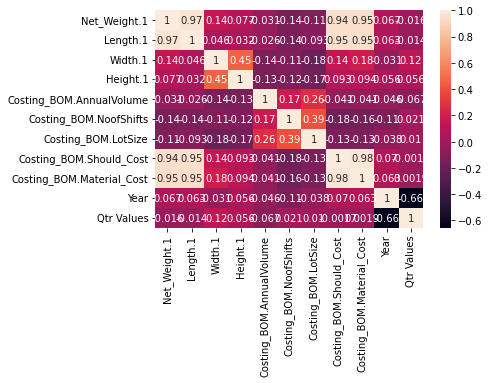

In [10]:
sns.heatmap(df.corr(),annot=True)

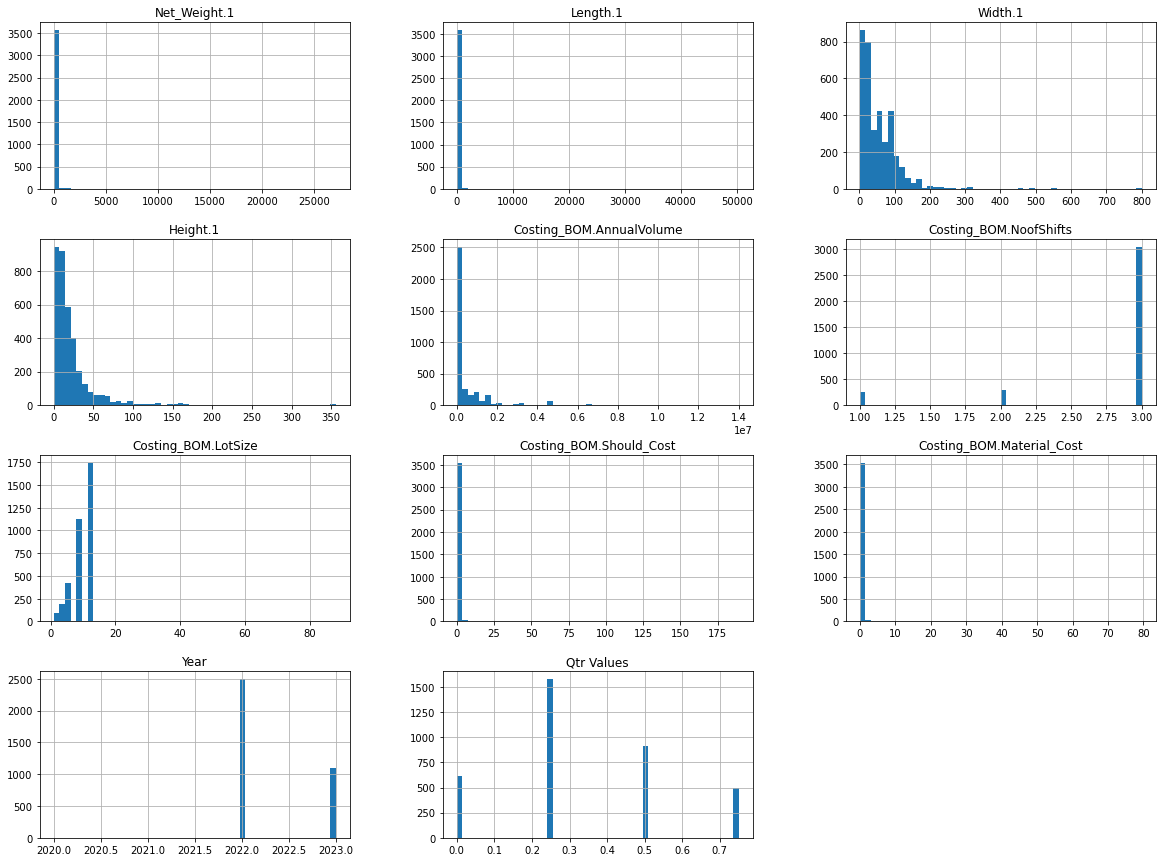

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

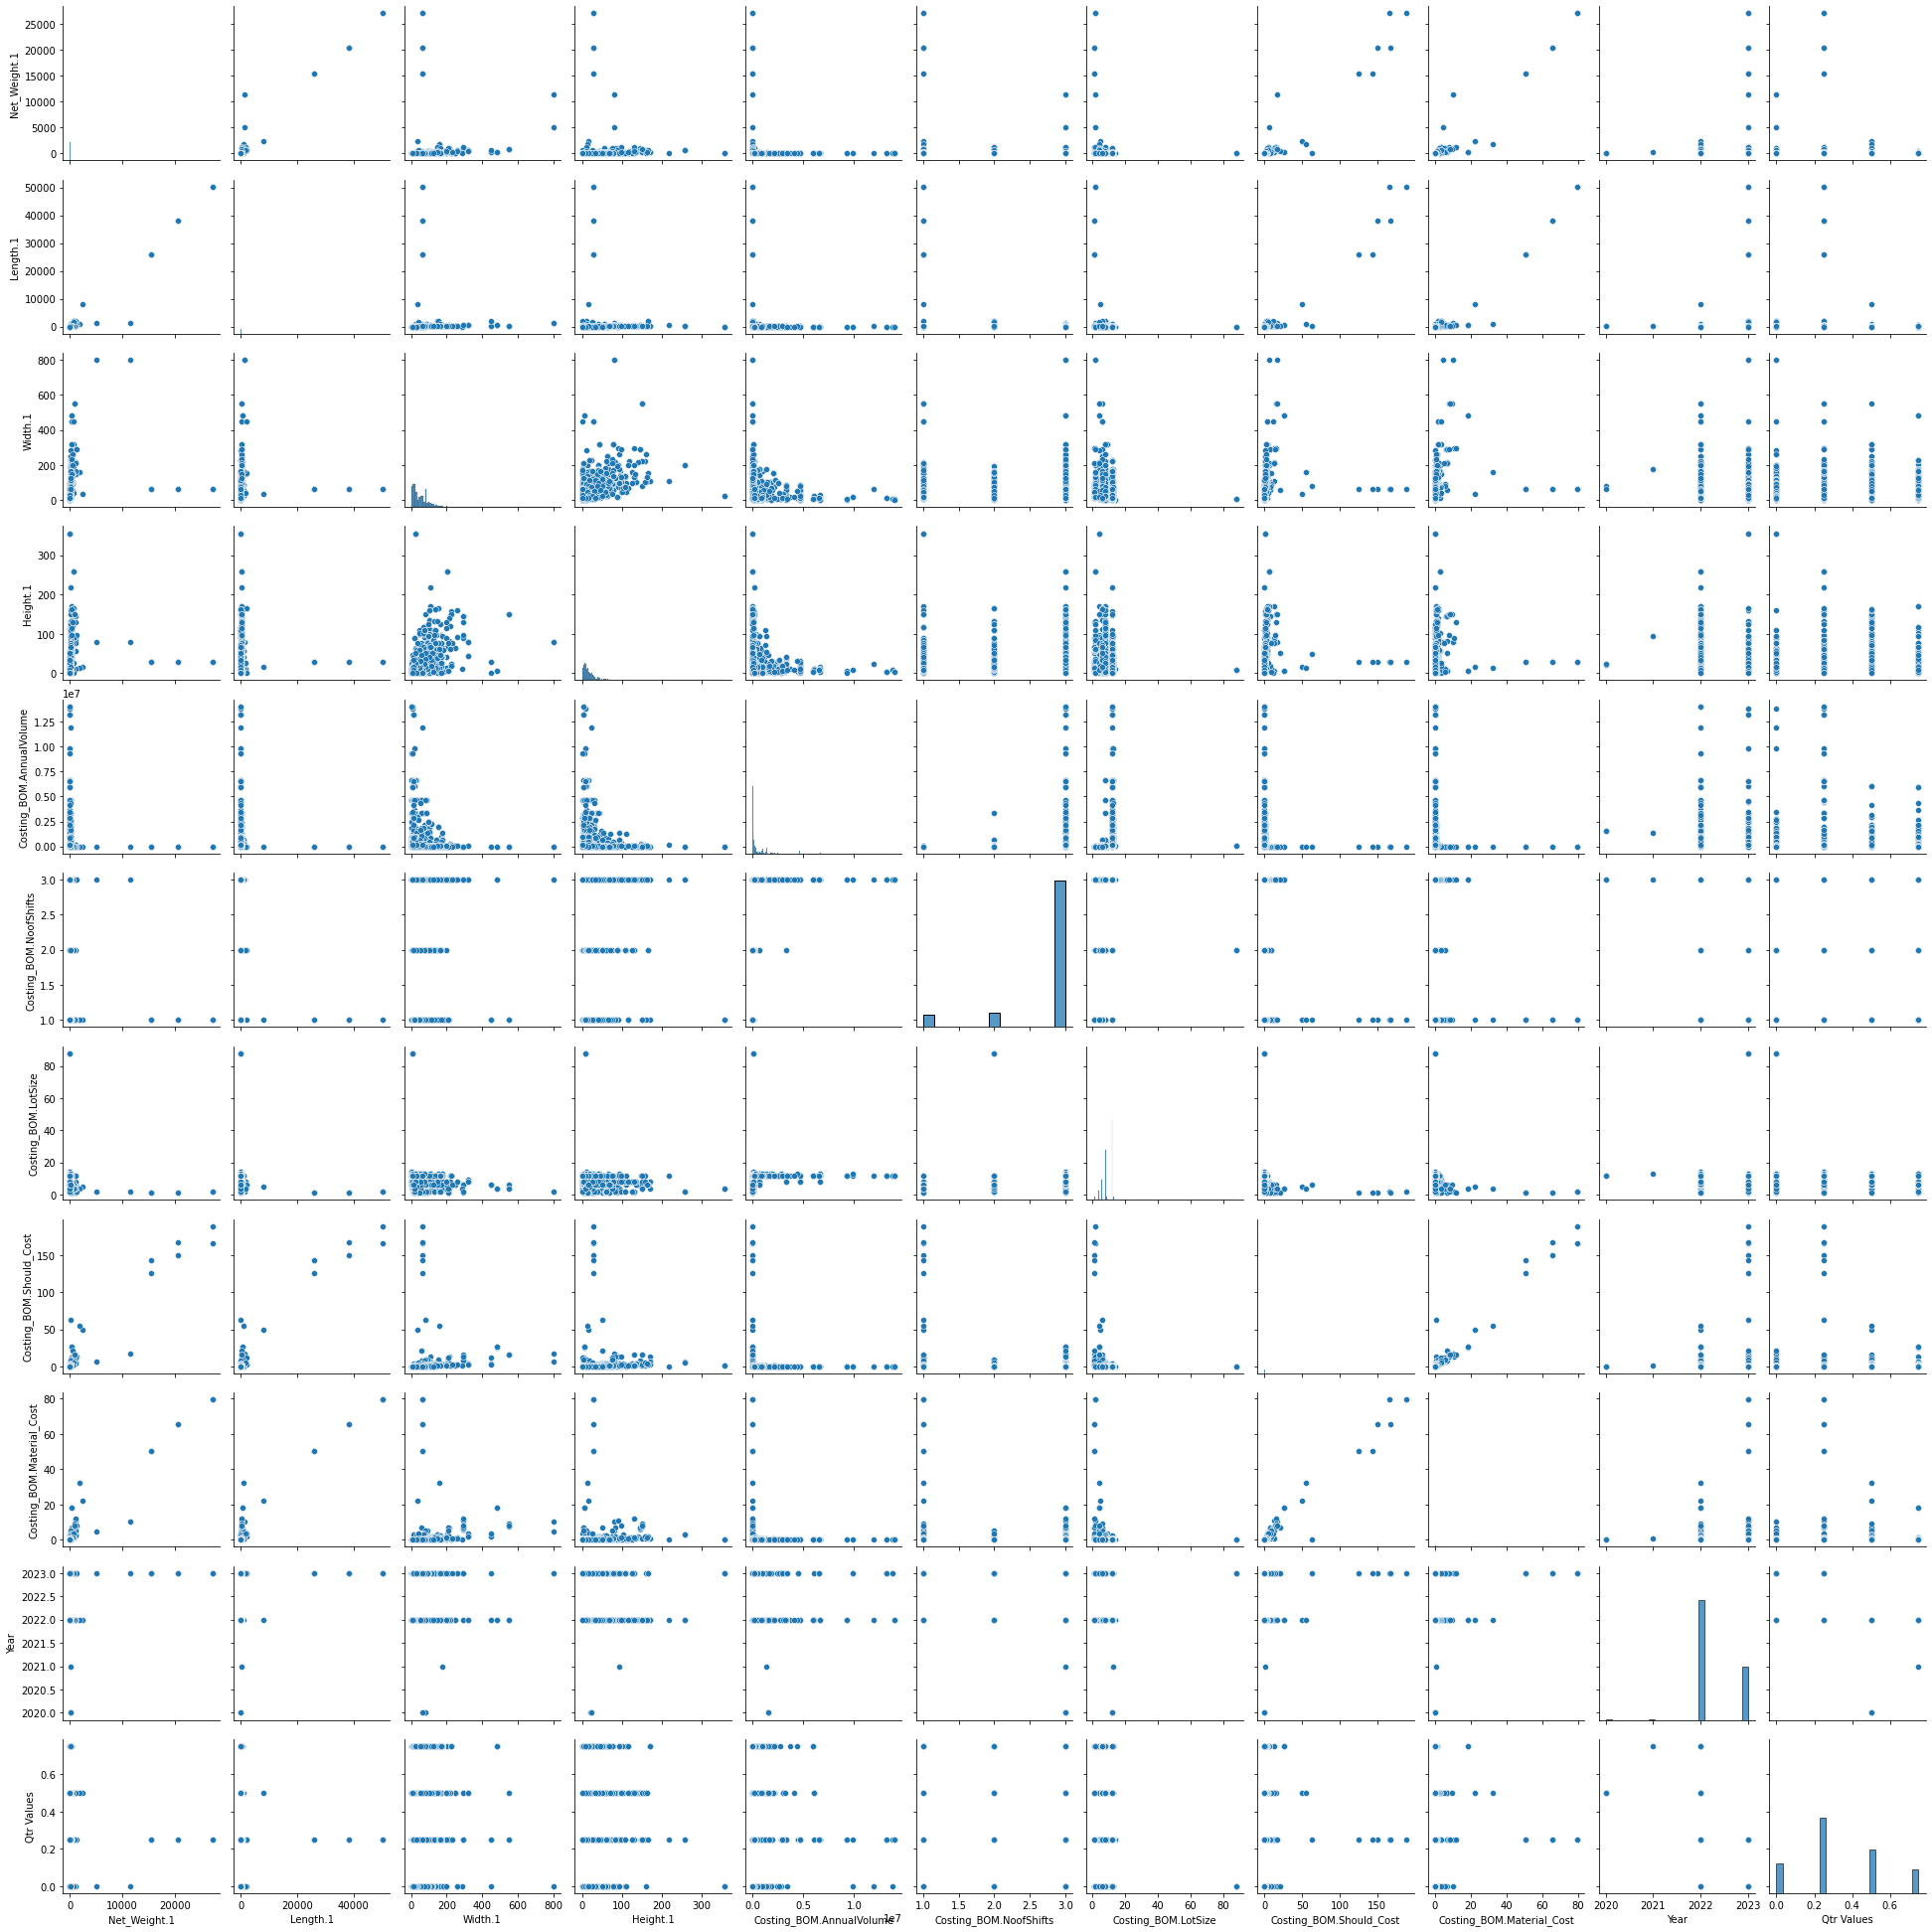

In [17]:
sns.pairplot(df)

In [13]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'y']
y = df.loc[:, df.columns == 'y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("length of the total data is ",len(X))
print("length of the train data is ",len(X_train))
print("length of the test data is is ",len(X_test))

length of the total data is  3598
length of the train data is  2410
length of the test data is is  1188
